In [1]:
import numpy as np
import pandas as pd
import sklearn

import os
import shutil

import scipy
import numpy as np
from sentence_transformers import models, SentenceTransformer


In [2]:
import re

df = pd.read_csv('test_data.csv', sep=';', header=None)
df.columns = ['text', 'label']

df = df.drop_duplicates()
or_df = df.copy()
df.loc[:, 'text'] = df['text'].apply(lambda x: re.sub(r"\([^()]*\)", "", x.replace('[', '(').replace(']', ')')))
corpus = df['text']

In [3]:

len(corpus)

92

In [4]:
df

,text,label
0,Сокращение расходов на обучение в компаниях,1
1,Снижение продаж в штуках,2
2,"Плохо знаем специфику отраслей, которые предст...",3
3,Очень долгий цикл корп продаж,4
4,Отношение к mba и классическому бизнес-образов...,5
...,...,...
87,Низкое качество инфраструктуры АБВ,58
88,Не работает ИТ инфраструктура,58
89,Нет денег на оперативную модернизацию инфрастр...,59
90,Не хватает человеко часов на инфраструктуры за...,60


In [5]:
model = SentenceTransformer('all-mpnet-base-v2')
corpus_embeddings = model.encode(corpus)
len(corpus_embeddings)

92

In [6]:
# corpus_embeddings = embedder.encode(corpus)
from sklearn.cluster import AgglomerativeClustering
from collections import OrderedDict
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform kmean clustering
clustered_sentences_l = []
big_clusters_l = []

for idx in range(0, 100):
    idx_i = idx /100
    clustering_model = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=idx_i) 
    clustering_model.fit(corpus_embeddings)
    cluster_assignment = clustering_model.labels_

    clustered_sentences = {}
    for sentence_id, cluster_id in enumerate(cluster_assignment):
        if cluster_id not in clustered_sentences:
            clustered_sentences[cluster_id] = []

        clustered_sentences[cluster_id].append([sentence_id, corpus[sentence_id]])
    clustered_sentences = OrderedDict(sorted(clustered_sentences.items()))

    big_clusters = len([j for ii, j in clustered_sentences.items() if len(j) > 2])

    clustered_sentences_l.append(len(clustered_sentences))
    big_clusters_l.append(big_clusters)
    print('NUM CLUSTERS', idx_i, len(clustered_sentences), big_clusters)

NUM CLUSTERS 0.0 92 0
NUM CLUSTERS 0.01 92 0
NUM CLUSTERS 0.02 92 0
NUM CLUSTERS 0.03 92 0
NUM CLUSTERS 0.04 92 0
NUM CLUSTERS 0.05 92 0
NUM CLUSTERS 0.06 91 0
NUM CLUSTERS 0.07 90 0
NUM CLUSTERS 0.08 89 0
NUM CLUSTERS 0.09 89 0
NUM CLUSTERS 0.1 88 0
NUM CLUSTERS 0.11 88 0
NUM CLUSTERS 0.12 87 0
NUM CLUSTERS 0.13 86 0
NUM CLUSTERS 0.14 82 0
NUM CLUSTERS 0.15 80 0
NUM CLUSTERS 0.16 79 1
NUM CLUSTERS 0.17 76 2
NUM CLUSTERS 0.18 73 2
NUM CLUSTERS 0.19 69 3
NUM CLUSTERS 0.2 66 5
NUM CLUSTERS 0.21 61 5
NUM CLUSTERS 0.22 57 7
NUM CLUSTERS 0.23 52 10
NUM CLUSTERS 0.24 49 10
NUM CLUSTERS 0.25 45 14
NUM CLUSTERS 0.26 38 16
NUM CLUSTERS 0.27 33 15
NUM CLUSTERS 0.28 32 16
NUM CLUSTERS 0.29 30 16
NUM CLUSTERS 0.3 27 14
NUM CLUSTERS 0.31 23 13
NUM CLUSTERS 0.32 21 11
NUM CLUSTERS 0.33 19 10
NUM CLUSTERS 0.34 17 8
NUM CLUSTERS 0.35 16 7
NUM CLUSTERS 0.36 13 6
NUM CLUSTERS 0.37 10 4
NUM CLUSTERS 0.38 9 3
NUM CLUSTERS 0.39 7 1
NUM CLUSTERS 0.4 7 1
NUM CLUSTERS 0.41 6 1
NUM CLUSTERS 0.42 5 1
NUM CLUSTE

In [7]:
len(clustering_model.distances_)

91

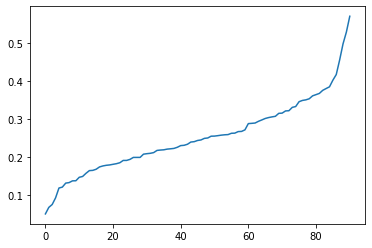

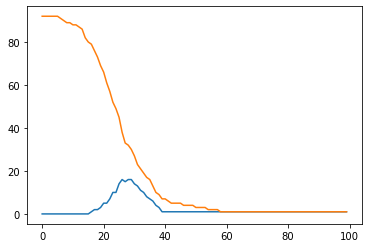

In [8]:
import matplotlib.pyplot as plt
plt.plot(clustering_model.distances_)
plt.show()
plt.plot(big_clusters_l)
plt.plot(clustered_sentences_l)
plt.show()

In [9]:
clustering_model = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=0.18)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
clusters_description = {}
clusters_embeddings = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []
        
        clusters_description[cluster_id] = {}
        clusters_description[cluster_id]['sentences'] = []
        
        clusters_embeddings[cluster_id] = {}
        clusters_embeddings[cluster_id]['embeddings'] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])
    
    clusters_embeddings[cluster_id]['embeddings'].append(corpus_embeddings[sentence_id])
  
    clusters_description[cluster_id]['sentences'].append(corpus[sentence_id])

cluster_embeddings_centers_list = []
for cluster_id in clusters_embeddings: 
    clusters_embeddings[cluster_id]['cluster_embeddings_center'] = np.mean(clusters_embeddings[cluster_id]['embeddings'], 0)
    cluster_embeddings_centers_list.append(clusters_embeddings[cluster_id]['cluster_embeddings_center'])
for cluster_id in clusters_embeddings:    
    clusters_description[cluster_id]['cos_sim_eachother'] = sklearn.metrics.pairwise.cosine_similarity(
                                                                clusters_embeddings[cluster_id]['embeddings'])
    clusters_description[cluster_id]['cos_sim_between_centers'] = sklearn.metrics.pairwise.cosine_similarity(
                                                                [clusters_embeddings[cluster_id]['cluster_embeddings_center']],
                                                                                             cluster_embeddings_centers_list) 

In [10]:
for i, cluster in clustered_sentences.items():
    if len(cluster) > 1:
        print("Cluster ", i)
        print(cluster)
        cluster_gt = []
        for j in cluster:
            cluster_gt.append(int(df.loc[df['text'] == j].label))
        print(cluster_gt)
        print("")

Cluster  35
['Отношение к mba и классическому бизнес-образованию оставляет желать лучшего', 'На рынке много маргинальных mba, которые девальвируют mba']
[5, 21]

Cluster  18
['Усиление гос образования', 'Проблема открытия границ']
[12, 17]

Cluster  9
['Сложно конкурировать с онлайн-школами в рамках коротких программ', 'Онлайн-школы с огромными маркетинговых бюджетами забивают каналы']
[16, 16]

Cluster  4
['Проблема конкурентного продукта', 'Трудности с разработкой конкурентных программ']
[20, 20]

Cluster  7
['Низкий охват бренда АБВ', 'Низкий охват бренда']
[23, 23]

Cluster  12
['Сложность формулирования правил игры для экосистемы', 'Не описаны принципы функционирования экосистемы']
[25, 25]

Cluster  11
['Нет сформулированного пакета ценностей для экосистемных партнёров', 'Нет стратегических целей']
[27, 37]

Cluster  8
['Очень низкие ставки преподавателей', 'Нет политики назначения сотрудников', 'Недостаток сильных преподавателей']
[29, 35, 42]

Cluster  16
['Низкий уровень мотив

In [11]:
#clusters_description = {
#cluster_id: 
#{
#'sentences': [список предложений n-штук],
#'cos_sim_eachother': [n*n матрица cosine sim каждого предложения из кластера с каждым],
#'cos_sim_between_centers': [len(кол-во кластеров) список cosine sim усредненных эмбеддингов каждого кластера с данным]
#},
#...}
clusters_description

{56: {'sentences': ['Сокращение расходов на обучение в компаниях'],
  'cos_sim_eachother': array([[1.0000001]], dtype=float32),
  'cos_sim_between_centers': array([[1.0000001 , 0.6513615 , 0.7253015 , 0.6393661 , 0.4505681 ,
          0.57296693, 0.72644603, 0.46583778, 0.6087727 , 0.67287695,
          0.6169057 , 0.7799227 , 0.6749308 , 0.6488389 , 0.7225424 ,
          0.6731744 , 0.66253555, 0.6380391 , 0.77733064, 0.5672523 ,
          0.7366179 , 0.71810114, 0.53171825, 0.5595445 , 0.56326216,
          0.6717176 , 0.56441975, 0.6828487 , 0.6497493 , 0.71216923,
          0.66137064, 0.64055574, 0.561636  , 0.65953046, 0.678154  ,
          0.6615831 , 0.69070613, 0.69416416, 0.5446794 , 0.6216272 ,
          0.61858624, 0.5778153 , 0.6244133 , 0.6731856 , 0.51993877,
          0.6949295 , 0.6483159 , 0.720873  , 0.64345956, 0.6276319 ,
          0.57881105, 0.6788058 , 0.52133566, 0.6555077 , 0.78728   ,
          0.5061662 , 0.7266558 , 0.61830306, 0.5218719 , 0.55394626,
     